##Importing Files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import uniform, randint
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
from sklearn.linear_model import LogisticRegression
import sklearn.ensemble as ske

from pprint import pprint
import random
import librosa, IPython
import librosa.display as lplt
seed = 12
np.random.seed(seed)

In [3]:
df = pd.read_csv('data.csv')
df.head(100)

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349951,0.130192,1784.416546,2002.657106,3806.418650,0.083066,-113.619385,121.553017,-19.151056,...,8.806787,-3.665802,5.745939,-5.161711,0.750298,-1.688358,-0.409329,-2.298869,1.219947,blues
1,blues.00001.wav,0.340945,0.095892,1529.871314,2038.612143,3548.986873,0.056044,-207.581512,123.997147,8.939115,...,5.375942,-2.237833,4.217125,-6.011047,0.932668,-0.717028,0.292333,-0.285717,0.532144,blues
2,blues.00002.wav,0.363562,0.175494,1552.637786,1747.382028,3041.089944,0.076301,-90.776344,140.448608,-29.100559,...,5.785763,-8.899733,-1.087024,-9.216774,2.453649,-7.721793,-1.816497,-3.434353,-2.231391,blues
3,blues.00003.wav,0.404848,0.141139,1070.110059,1596.244204,2185.061787,0.033309,-199.462006,150.094727,5.649167,...,6.085354,-2.476188,-1.076225,-2.876056,0.776909,-3.320055,0.637263,-0.617507,-3.406940,blues
4,blues.00004.wav,0.308598,0.091540,1835.507009,1748.367477,3581.003346,0.101500,-160.291855,126.195763,-35.602501,...,-2.809849,-6.935621,-7.559294,-9.172152,-4.510408,-5.453736,-0.924468,-4.408076,-11.701833,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,blues.00095.wav,0.369967,0.187063,1388.445487,1772.842265,2754.616677,0.057147,-130.581528,139.974899,-1.270736,...,1.613636,-6.629041,4.952462,-1.633869,0.953964,-4.841609,-5.970589,-2.786720,-6.492816,blues
96,blues.00096.wav,0.260613,0.051328,1132.518423,1582.765488,2066.245839,0.048314,-314.582184,139.914444,11.862516,...,2.063028,-11.438629,-9.510527,-15.186691,-9.362388,-5.665494,1.562117,0.897125,-7.956727,blues
97,blues.00097.wav,0.375284,0.198204,1236.606353,1602.301481,2604.350919,0.044626,-148.647705,145.737762,-9.363346,...,3.223536,-0.679759,-0.730185,-6.821439,-3.937920,-15.737845,-5.596368,-5.797905,-0.047468,blues
98,blues.00098.wav,0.443195,0.125339,2310.141083,2206.528237,4829.087466,0.128426,-90.707222,100.107582,-23.924427,...,12.994508,-11.420426,2.911845,-12.017497,4.827647,-11.165411,1.162211,-3.921333,3.253202,blues


In [4]:
print("Dataset has",df.shape)
df.label.value_counts().reset_index()

Dataset has (999, 28)


,index,label
0,blues,100
1,classical,100
2,country,100
3,disco,100
4,hiphop,100
5,metal,100
6,pop,100
7,reggae,100
8,rock,100
9,jazz,99


##Viusalize audio

In [5]:
audio_fp = 'gtzan/genres_original/rock/rock.00001.wav'
audio_data, sr = librosa.load(audio_fp, offset=0, duration=30)
audio_data, _ = librosa.effects.trim(audio_data)
audio_data.shape

(661500,)

In [6]:
collection = np.split(audio_data,10)

In [7]:
# play sample file
IPython.display.Audio(audio_data, rate=sr)

In [10]:
plt.figure(figsize=(15,5))
lplt.waveplot(audio_data)
plt.show()


AttributeError: module 'librosa.display' has no attribute 'waveplot'

<Figure size 1080x360 with 0 Axes>

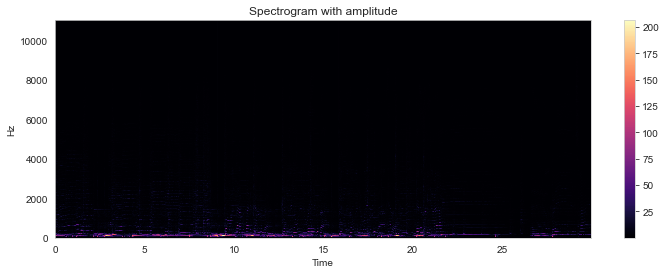

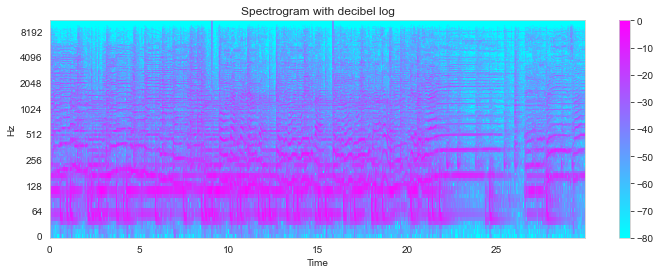

In [11]:
# Default FFT window size
n_fft = 2048 # window size
hop_length = 512 # window hop length for STFT

stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

plt.figure(figsize=(12,4))
lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()

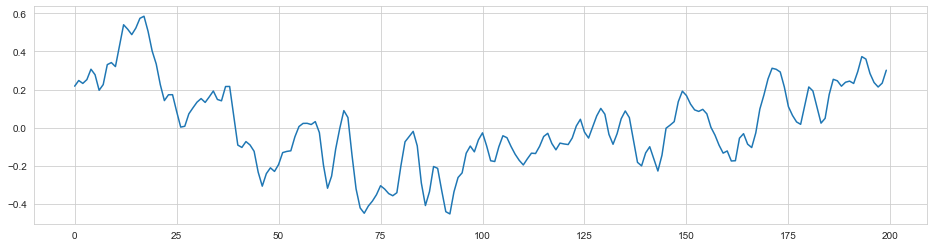

In [12]:
# plot zoomed audio wave 
start = 1000
end = 1200
plt.figure(figsize=(16,4))
plt.plot(audio_data[start:end])
plt.show()

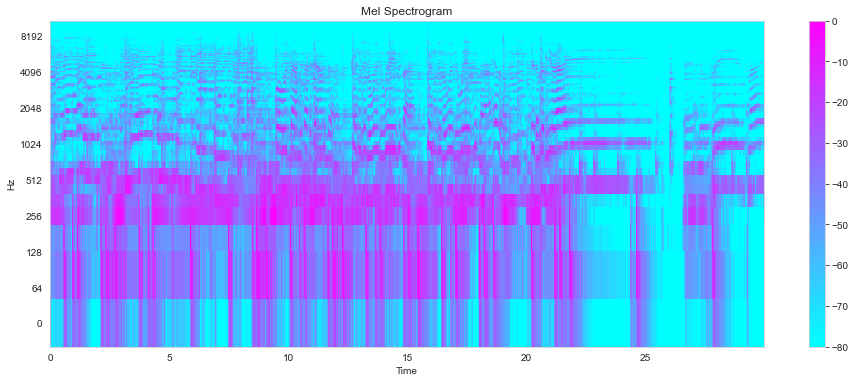

In [14]:
mel_spec = librosa.feature.melspectrogram(audio_data, sr=sr)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(16,6))
lplt.specshow(mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()

In [17]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# # Top 2 pca components
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(X)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# # concatenate with target label
# finalDf = pd.concat([principalDf, y], axis = 1)

# plt.figure(figsize = (16, 9))
# sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

# plt.title('PCA on Genres', fontsize = 20)
# plt.xticks(fontsize = 14)
# plt.yticks(fontsize = 10);
# plt.xlabel("Principal Component 1", fontsize = 15)
# plt.ylabel("Principal Component 2", fontsize = 15)
# plt.savefig("PCA_Scattert.png")

In [18]:
# find all columns with any NA values
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


No null values in the dataset

There are no categorical variable as such. Hence, Dummy variable creation is not needed.

## Encode Genre Label¶


In [19]:
# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(df.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [ ]:
'''# update labels in df to index
df.label = [label_index[l] for l in df.label]'''

'# update labels in df to index\ndf.label = [label_index[l] for l in df.label]'

## Split Train Dev & Test Sets

## Scale the Features

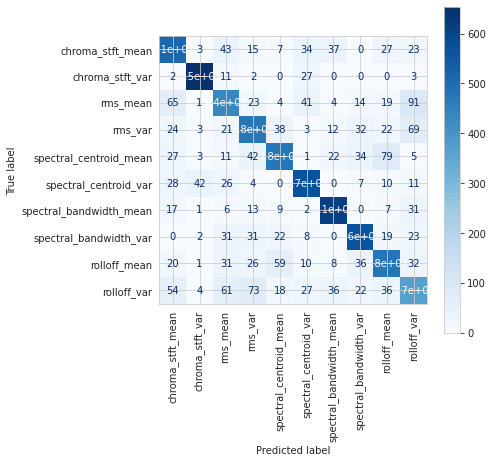

              precision    recall  f1-score   support

       blues      0.683     0.730     0.706       700
   classical      0.916     0.936     0.926       699
     country      0.644     0.625     0.634       698
       disco      0.675     0.680     0.677       699
      hiphop      0.752     0.680     0.714       699
        jazz      0.789     0.817     0.803       700
       metal      0.838     0.877     0.857       700
         pop      0.795     0.806     0.801       700
      reggae      0.685     0.681     0.683       700
        rock      0.560     0.526     0.542       698

    accuracy                          0.736      6993
   macro avg      0.734     0.736     0.734      6993
weighted avg      0.734     0.736     0.734      6993



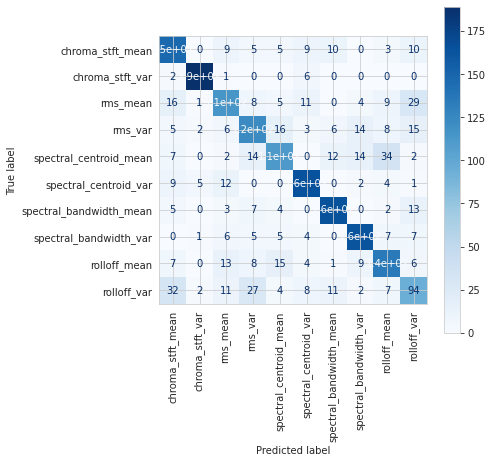

              precision    recall  f1-score   support

       blues      0.639     0.742     0.687       198
   classical      0.945     0.955     0.950       198
     country      0.644     0.579     0.610       197
       disco      0.624     0.621     0.623       198
      hiphop      0.675     0.569     0.617       197
        jazz      0.786     0.833     0.809       198
       metal      0.804     0.828     0.816       198
         pop      0.784     0.823     0.803       198
      reggae      0.646     0.682     0.663       198
        rock      0.531     0.475     0.501       198

    accuracy                          0.711      1978
   macro avg      0.708     0.711     0.708      1978
weighted avg      0.708     0.711     0.708      1978



In [ ]:
lr = LogisticRegression(random_state=seed)
lr.fit(X_train,y_train)
predictProba(lr, X_train)
predictProba(lr, X_train, dev=True)

## Permutation Importance Feature Selection

---



In [ ]:
pip install eli5

     |████████████████████████████████| 112kB 7.8MB/s 


In [ ]:

import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
perm = PermutationImportance(lr, random_state=seed).fit(X_train, y_train, n_iter=10)
print("Feature Importances using Permutation Importance")
eli5.show_weights(perm, feature_names = X_dev.columns.tolist())

Feature Importances using Permutation Importance


Weight,Feature
0.1722 ± 0.0118,spectral_centroid_mean
0.1473 ± 0.0085,spectral_bandwidth_mean
0.1452 ± 0.0094,mfcc1_mean
0.1366 ± 0.0086,rolloff_mean
0.1268 ± 0.0072,zero_crossing_rate_mean
0.1026 ± 0.0036,perceptr_var
0.0961 ± 0.0048,mfcc3_mean
0.0865 ± 0.0046,rms_mean
0.0859 ± 0.0025,chroma_stft_mean
0.0786 ± 0.0068,mfcc2_mean


### Plot Permutation Importances

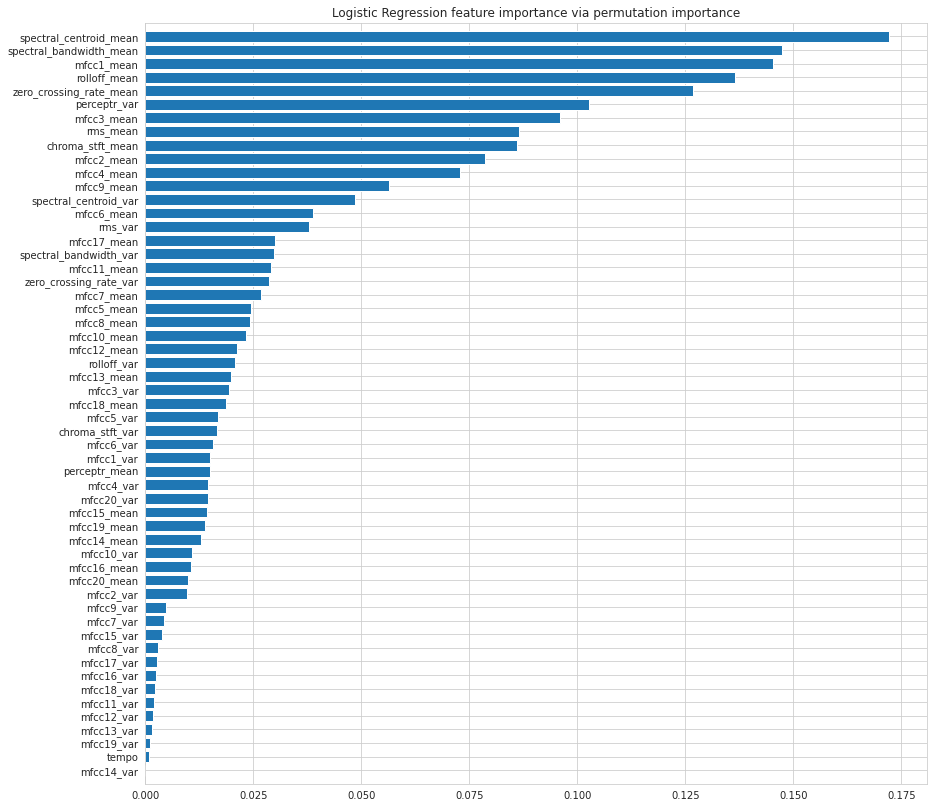

In [ ]:
# plot the permutation importances
perm_indices = np.argsort(perm.feature_importances_)[::-1]
perm_features = [X_dev.columns.tolist()[xx] for xx in perm_indices]
plt.figure(figsize=(14, 14))
plt.title("Logistic Regression feature importance via permutation importance")
plt.barh(range(X_dev.shape[1]), perm.feature_importances_[perm_indices])
plt.yticks(range(X_dev.shape[1]), perm_features)
plt.ylim([X_dev.shape[1], -1])
plt.show()

### Model Score using Permutation Importances

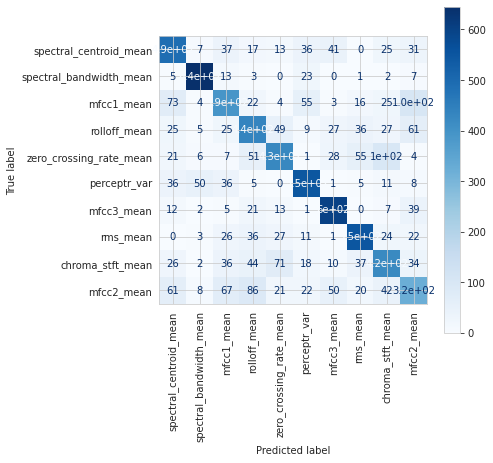

              precision    recall  f1-score   support

       blues      0.656     0.704     0.679       700
   classical      0.881     0.923     0.901       699
     country      0.608     0.560     0.583       698
       disco      0.604     0.622     0.613       699
      hiphop      0.683     0.609     0.644       699
        jazz      0.757     0.783     0.770       700
       metal      0.788     0.857     0.821       700
         pop      0.764     0.786     0.775       700
      reggae      0.616     0.603     0.609       700
        rock      0.508     0.460     0.483       698

    accuracy                          0.691      6993
   macro avg      0.686     0.691     0.688      6993
weighted avg      0.687     0.691     0.688      6993



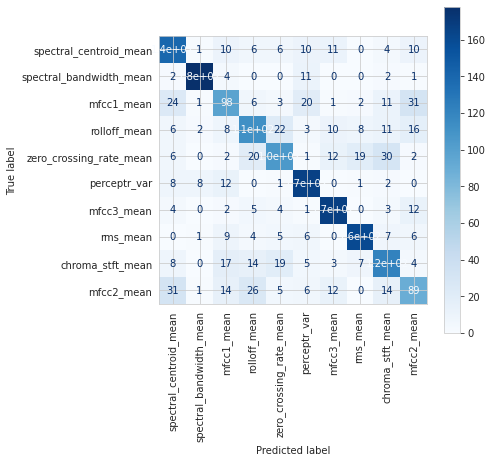

              precision    recall  f1-score   support

       blues      0.611     0.707     0.656       198
   classical      0.927     0.899     0.913       198
     country      0.557     0.497     0.525       197
       disco      0.580     0.566     0.573       198
      hiphop      0.618     0.533     0.572       197
        jazz      0.725     0.838     0.778       198
       metal      0.773     0.843     0.807       198
         pop      0.812     0.808     0.810       198
      reggae      0.590     0.611     0.600       198
        rock      0.520     0.449     0.482       198

    accuracy                          0.675      1978
   macro avg      0.671     0.675     0.672      1978
weighted avg      0.671     0.675     0.672      1978



In [ ]:
# build model using perm selected top 30 features
lr = LogisticRegression()
X_train_perm = X_train[perm_features[:30]]
X_train_rfe = X_train_perm
lr.fit(X_train_perm,y_train)
predictProba(lr, X_train_perm)
predictProba(lr, X_train_perm, dev=True)


In [ ]:
'''# plot correlation among top 30 selected featuers
plt.figure(figsize = (18, 10))
sns.heatmap(X_train_perm.corr(method='spearman'), annot = True, linewidths=.2, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()'''


"# plot correlation among top 30 selected featuers\nplt.figure(figsize = (18, 10))\nsns.heatmap(X_train_perm.corr(method='spearman'), annot = True, linewidths=.2, cmap=sns.diverging_palette(220, 10, as_cmap=True))\nplt.show()"

## Model Building

### Logistic Regression

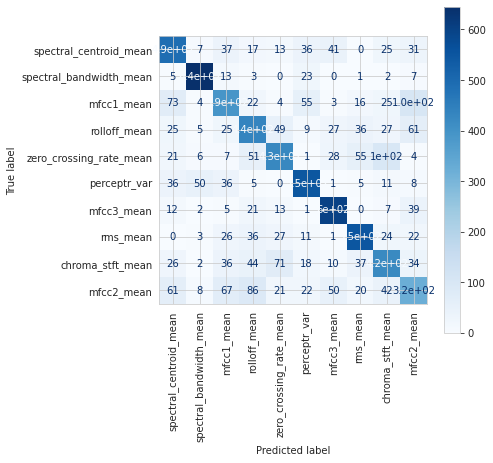

              precision    recall  f1-score   support

       blues      0.656     0.704     0.679       700
   classical      0.881     0.923     0.901       699
     country      0.608     0.560     0.583       698
       disco      0.604     0.622     0.613       699
      hiphop      0.683     0.609     0.644       699
        jazz      0.757     0.783     0.770       700
       metal      0.788     0.857     0.821       700
         pop      0.764     0.786     0.775       700
      reggae      0.616     0.603     0.609       700
        rock      0.508     0.460     0.483       698

    accuracy                          0.691      6993
   macro avg      0.686     0.691     0.688      6993
weighted avg      0.687     0.691     0.688      6993



In [ ]:
lr = LogisticRegression()
lr.fit(X_train_rfe,y_train)
predictProba(lr, X_train_rfe)

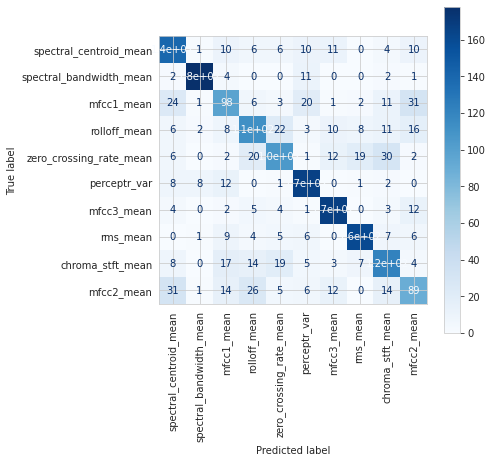

              precision    recall  f1-score   support

       blues      0.611     0.707     0.656       198
   classical      0.927     0.899     0.913       198
     country      0.557     0.497     0.525       197
       disco      0.580     0.566     0.573       198
      hiphop      0.618     0.533     0.572       197
        jazz      0.725     0.838     0.778       198
       metal      0.773     0.843     0.807       198
         pop      0.812     0.808     0.810       198
      reggae      0.590     0.611     0.600       198
        rock      0.520     0.449     0.482       198

    accuracy                          0.675      1978
   macro avg      0.671     0.675     0.672      1978
weighted avg      0.671     0.675     0.672      1978



In [ ]:
predictProba(lr, X_train_rfe, True)

### Random Forest

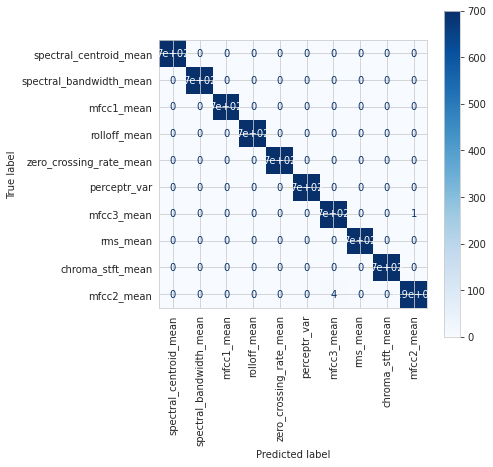

              precision    recall  f1-score   support

       blues      1.000     1.000     1.000       700
   classical      1.000     1.000     1.000       699
     country      1.000     1.000     1.000       698
       disco      1.000     1.000     1.000       699
      hiphop      1.000     1.000     1.000       699
        jazz      1.000     1.000     1.000       700
       metal      0.994     0.999     0.996       700
         pop      1.000     1.000     1.000       700
      reggae      1.000     1.000     1.000       700
        rock      0.999     0.994     0.996       698

    accuracy                          0.999      6993
   macro avg      0.999     0.999     0.999      6993
weighted avg      0.999     0.999     0.999      6993



In [ ]:
rfc = ske.RandomForestClassifier(random_state=seed, n_jobs=-1)
rfc.fit(X_train_rfe, y_train)
predictProba(rfc, X_train_rfe)

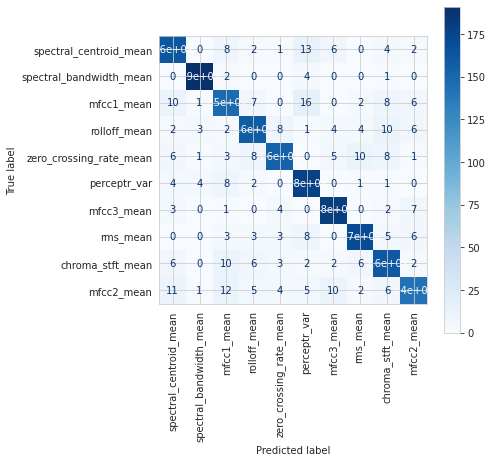

              precision    recall  f1-score   support

       blues      0.794     0.818     0.806       198
   classical      0.950     0.965     0.957       198
     country      0.750     0.746     0.748       197
       disco      0.827     0.798     0.812       198
      hiphop      0.871     0.787     0.827       197
        jazz      0.784     0.899     0.838       198
       metal      0.870     0.914     0.892       198
         pop      0.872     0.859     0.865       198
      reggae      0.782     0.813     0.797       198
        rock      0.826     0.717     0.768       198

    accuracy                          0.832      1978
   macro avg      0.833     0.832     0.831      1978
weighted avg      0.833     0.832     0.831      1978



In [ ]:
predictProba(rfc, X_train_rfe, True)

### AdaBoost

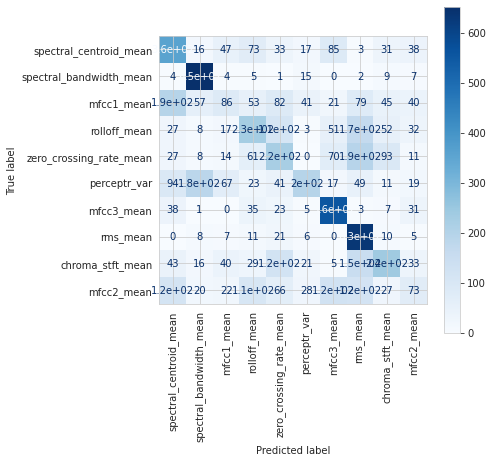

              precision    recall  f1-score   support

       blues      0.397     0.510     0.447       700
   classical      0.672     0.933     0.781       699
     country      0.283     0.123     0.172       698
       disco      0.367     0.329     0.347       699
      hiphop      0.309     0.319     0.314       699
        jazz      0.589     0.279     0.378       700
       metal      0.600     0.796     0.684       700
         pop      0.452     0.903     0.602       700
      reggae      0.457     0.343     0.392       700
        rock      0.253     0.105     0.148       698

    accuracy                          0.464      6993
   macro avg      0.438     0.464     0.426      6993
weighted avg      0.438     0.464     0.427      6993



In [ ]:
abc = ske.AdaBoostClassifier(n_estimators=150, random_state=seed)
abc.fit(X_train_rfe, y_train)
predictProba(abc, X_train_rfe)

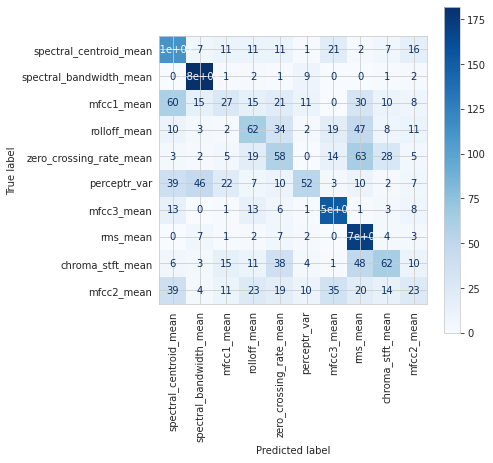

              precision    recall  f1-score   support

       blues      0.395     0.561     0.463       198
   classical      0.677     0.919     0.779       198
     country      0.281     0.137     0.184       197
       disco      0.376     0.313     0.342       198
      hiphop      0.283     0.294     0.289       197
        jazz      0.565     0.263     0.359       198
       metal      0.620     0.768     0.686       198
         pop      0.438     0.869     0.582       198
      reggae      0.446     0.313     0.368       198
        rock      0.247     0.116     0.158       198

    accuracy                          0.456      1978
   macro avg      0.433     0.455     0.421      1978
weighted avg      0.433     0.456     0.421      1978



In [ ]:
predictProba(abc, X_train_rfe, True)

### GBM

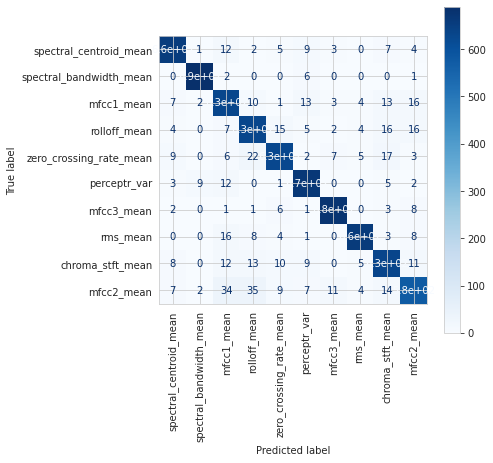

              precision    recall  f1-score   support

       blues      0.943     0.939     0.941       700
   classical      0.980     0.987     0.984       699
     country      0.860     0.901     0.880       698
       disco      0.874     0.901     0.887       699
      hiphop      0.925     0.898     0.911       699
        jazz      0.926     0.954     0.940       700
       metal      0.963     0.969     0.966       700
         pop      0.968     0.943     0.955       700
      reggae      0.890     0.903     0.896       700
        rock      0.893     0.824     0.857       698

    accuracy                          0.922      6993
   macro avg      0.922     0.922     0.922      6993
weighted avg      0.922     0.922     0.922      6993



In [ ]:
gbc = ske.GradientBoostingClassifier(n_estimators=100, random_state=seed)
gbc.fit(X_train_rfe, y_train)
predictProba(gbc, X_train_rfe)

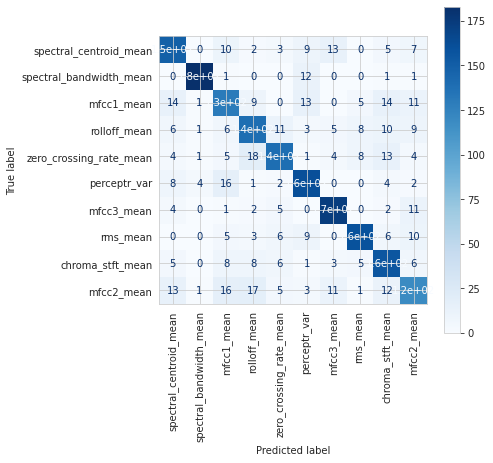

              precision    recall  f1-score   support

       blues      0.734     0.753     0.743       198
   classical      0.958     0.924     0.941       198
     country      0.657     0.660     0.658       197
       disco      0.698     0.702     0.700       198
      hiphop      0.785     0.706     0.743       197
        jazz      0.759     0.813     0.785       198
       metal      0.828     0.874     0.850       198
         pop      0.855     0.803     0.828       198
      reggae      0.700     0.788     0.741       198
        rock      0.661     0.601     0.630       198

    accuracy                          0.762      1978
   macro avg      0.764     0.762     0.762      1978
weighted avg      0.764     0.762     0.762      1978



In [ ]:
predictProba(gbc, X_train_rfe, True)

### XGBoost

In [ ]:
import xgboost as xgb
print(xgb.__version__)


0.90


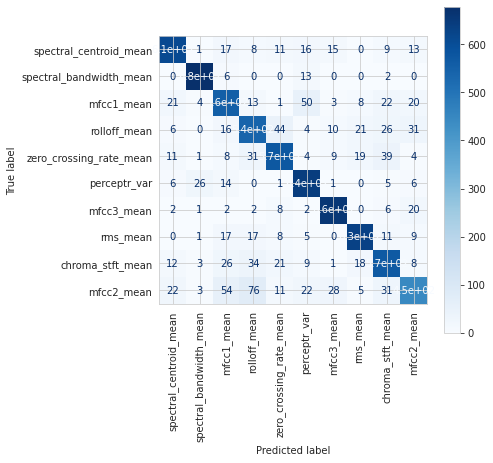

              precision    recall  f1-score   support

       blues      0.884     0.871     0.878       700
   classical      0.944     0.970     0.957       699
     country      0.777     0.797     0.786       698
       disco      0.749     0.774     0.761       699
      hiphop      0.845     0.820     0.832       699
        jazz      0.837     0.916     0.874       700
       metal      0.907     0.939     0.923       700
         pop      0.899     0.903     0.901       700
      reggae      0.790     0.811     0.801       700
        rock      0.801     0.639     0.711       698

    accuracy                          0.844      6993
   macro avg      0.843     0.844     0.842      6993
weighted avg      0.843     0.844     0.842      6993



In [ ]:
xgbc = xgb.XGBClassifier(n_estimators=100, random_state=seed)
xgbc.fit(X_train_rfe, y_train)
predictProba(xgbc, X_train_rfe)

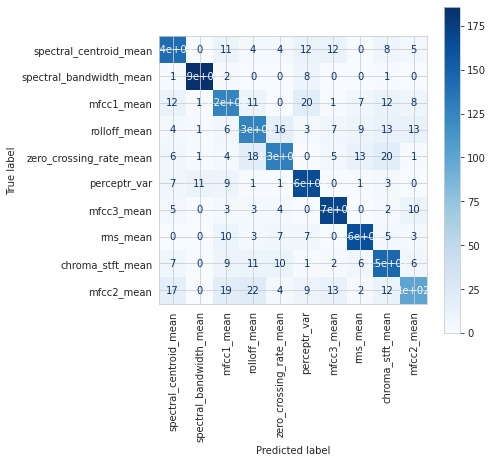

              precision    recall  f1-score   support

       blues      0.706     0.717     0.712       198
   classical      0.930     0.939     0.935       198
     country      0.631     0.635     0.633       197
       disco      0.633     0.636     0.635       198
      hiphop      0.737     0.655     0.694       197
        jazz      0.733     0.833     0.780       198
       metal      0.810     0.864     0.836       198
         pop      0.811     0.823     0.817       198
      reggae      0.658     0.737     0.695       198
        rock      0.685     0.505     0.581       198

    accuracy                          0.735      1978
   macro avg      0.734     0.734     0.732      1978
weighted avg      0.734     0.735     0.732      1978



In [ ]:
predictProba(xgbc, X_train_rfe, True)

### CatBoost

In [ ]:
pip install catboost 


     |████████████████████████████████| 67.3MB 58kB/s 


In [ ]:
import catboost as cb
print(cb.__version__)

0.25.1


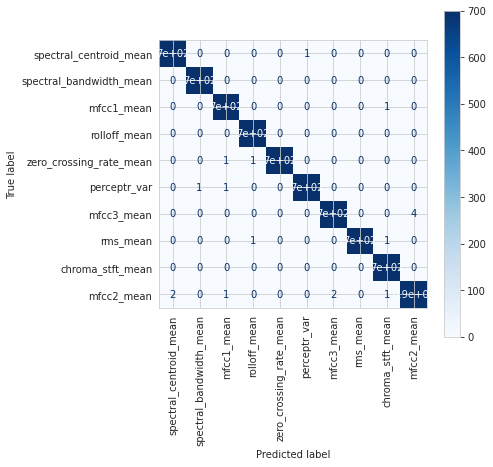

              precision    recall  f1-score   support

       blues      0.997     0.999     0.998       700
   classical      0.999     1.000     0.999       699
     country      0.996     0.999     0.997       698
       disco      0.997     1.000     0.999       699
      hiphop      1.000     0.997     0.999       699
        jazz      0.999     0.997     0.998       700
       metal      0.997     0.994     0.996       700
         pop      1.000     0.997     0.999       700
      reggae      0.996     1.000     0.998       700
        rock      0.994     0.991     0.993       698

    accuracy                          0.997      6993
   macro avg      0.997     0.997     0.997      6993
weighted avg      0.997     0.997     0.997      6993



In [ ]:
cbc = cb.CatBoostClassifier(random_state=seed, verbose=0, eval_metric='Accuracy', loss_function='MultiClass')
cbc.fit(X_train_rfe, y_train)
predictProba(cbc, X_train_rfe)